In [1]:
#importamos las librerias
import pandas as pd
import numpy as np
import pylab as plt
import seaborn as sns

In [2]:
data = pd.read_csv('../data/attacks.csv', encoding='utf-8', encoding_errors='ignore') #cargamos el archivo

# Primera exploración

In [3]:
data.head() #primera visualización del archivo

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,AdysonMcNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN


In [4]:
columns = data.columns

# Quitar los espacio en los nombres de las columnas
new_columns = [col.replace(' ', '') for col in columns]

# Renombrar las columnas
data = data.rename(columns=dict(zip(columns, new_columns)))

In [5]:
data.shape #dimensiones del archivo

(25723, 24)

In [6]:
data.info() #información de cada columnas y su tipo de datos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25723 entries, 0 to 25722
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CaseNumber            8702 non-null   object 
 1   Date                  6302 non-null   object 
 2   Year                  6300 non-null   float64
 3   Type                  6298 non-null   object 
 4   Country               6252 non-null   object 
 5   Area                  5847 non-null   object 
 6   Location              5762 non-null   object 
 7   Activity              5758 non-null   object 
 8   Name                  6092 non-null   object 
 9   Sex                   5737 non-null   object 
 10  Age                   3471 non-null   object 
 11  Injury                6274 non-null   object 
 12  Fatal(Y/N)            5763 non-null   object 
 13  Time                  2948 non-null   object 
 14  Species               3464 non-null   object 
 15  InvestigatororSourc

In [7]:
data.tail() #las filas del final estan llenas de nulos

,CaseNumber,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,InvestigatororSource,pdf,hrefformula,href,CaseNumber.1,CaseNumber.2,originalorder,Unnamed:22,Unnamed:23
25718,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25719,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25720,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25721,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25722,xx,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
nan_cols = data.isna().sum() #comprobamos la cantidad de nulos que hay en cada columna
nan_cols[nan_cols>0] 

CaseNumber              17021
Date                    19421
Year                    19423
Type                    19425
Country                 19471
Area                    19876
Location                19961
Activity                19965
Name                    19631
Sex                     19986
Age                     22252
Injury                  19449
Fatal(Y/N)              19960
Time                    22775
Species                 22259
InvestigatororSource    19438
pdf                     19421
hrefformula             19422
href                    19421
CaseNumber.1            19421
CaseNumber.2            19421
originalorder           19414
Unnamed:22              25722
Unnamed:23              25721
dtype: int64

In [9]:
def check_nan(data: pd.DataFrame):  
    plt.figure(figsize=(10, 6))

    sns.heatmap(data.isna(),    #visualizamos la cantidad de nulos
                yticklabels=False,  
                cmap='viridis',     
                cbar=False,         
               )


    plt.show();

In [10]:
data.dropna(how='all', inplace=True) #borramos todas las filas que tengan nulos

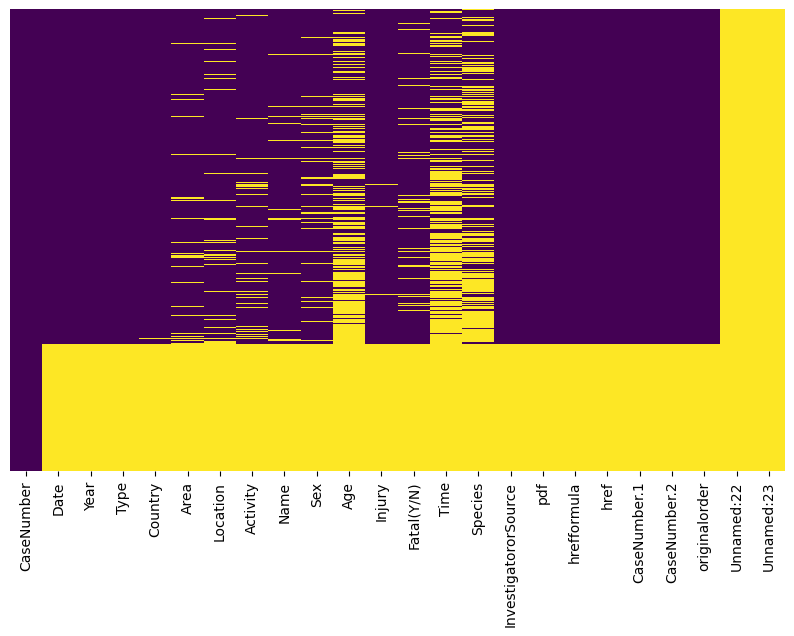

In [11]:
check_nan(data)

In [12]:
#comprobamos que ha habido un error en el enconding, poniendo 0 en las primera columna 
data.drop(index=data.index[6309:], inplace=True)  #tomamos la decisión de eliminar las filas nulas sin tener en cuenta esta primera columna
data.tail()

,CaseNumber,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,InvestigatororSource,pdf,hrefformula,href,CaseNumber.1,CaseNumber.2,originalorder,Unnamed:22,Unnamed:23
6304,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6306.0,NaN,NaN
6305,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6307.0,NaN,NaN
6306,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6308.0,NaN,NaN
6307,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6309.0,NaN,NaN
6308,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6310.0,NaN,NaN


In [13]:
nan_cols = data.isna().mean() * 100  # porcentaje de nulo en cada columna
nan_cols[nan_cols>0]                 #las dos últimas dolumnas son nulas en un 99% y no son relevantes en este análisis

CaseNumber               0.015850
Date                     0.110953
Year                     0.142653
Type                     0.174354
Country                  0.903471
Area                     7.322872
Location                 8.670154
Activity                 8.733555
Name                     3.439531
Sex                      9.066413
Age                     44.983357
Injury                   0.554763
Fatal(Y/N)               8.654303
Time                    53.273102
Species                 45.094310
InvestigatororSource     0.380409
pdf                      0.110953
hrefformula              0.126803
href                     0.110953
CaseNumber.1             0.110953
CaseNumber.2             0.110953
Unnamed:22              99.984150
Unnamed:23              99.968299
dtype: float64

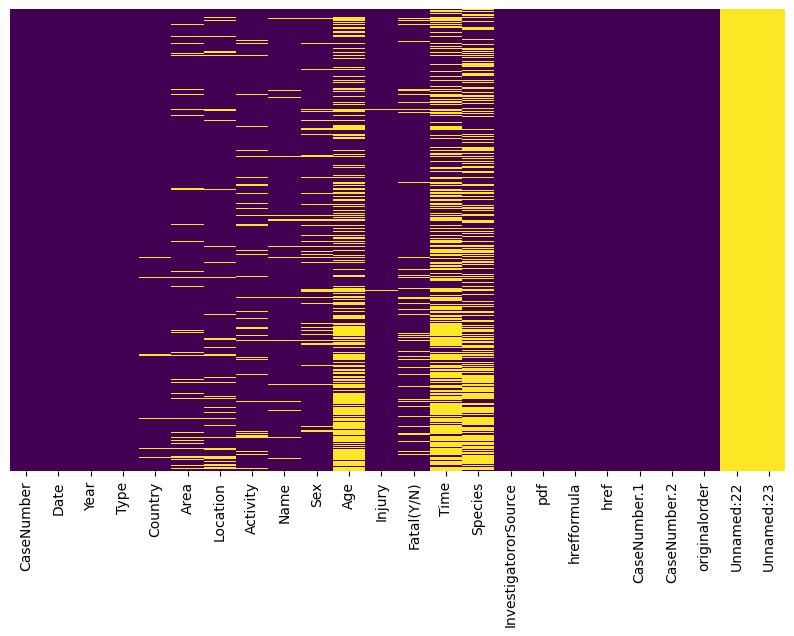

In [14]:
check_nan(data)

In [15]:
subset = data[['Date', 'Year', 'Type', 'Country', 'Area', 'Location', 'Activity', 'Name', 'Sex', 'Age', 'Injury', 'Fatal(Y/N)']]

subset.duplicated().any()   # Comprobamos si existen duplicadas


True

In [16]:
subset[subset.duplicated()] #obtenemos los indices de los duplicados

,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal(Y/N)
4688,Fall 1943,1943.0,Unprovoked,USA,Hawaii,"Midway Island, Northwestern Hawaiian Islands",Spearfishing,2 males,M,NaN,Calf nipped in each case,N
5709,1890,1890.0,Unprovoked,INDIA,Tamil Nadu,Tuticorin,Diving,a pearl diver,M,NaN,No details,UNKNOWN
6295,Before 1906,0.0,Unprovoked,AUSTRALIA,NaN,NaN,Fishing,fisherman,M,NaN,FATAL,Y
6303,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6304,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6305,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6306,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6308,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
data.drop([4688, 5709, 6295,6302, 6303, 6304, 6305,6306,6307, 6308], inplace=True) #borramos las columnas duplicadas

In [18]:
data.tail()

,CaseNumber,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,InvestigatororSource,pdf,hrefformula,href,CaseNumber.1,CaseNumber.2,originalorder,Unnamed:22,Unnamed:23
6297,ND.0005,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,male,M,...,NaN,"H. Taunton; N. Bartlett, p. 234",ND-0005-RoebuckBay.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0005,ND.0005,6.0,NaN,NaN
6298,ND.0004,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,NaN,Pearl diving,Ahmun,M,...,NaN,"H. Taunton; N. Bartlett, pp. 233-234",ND-0004-Ahmun.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0004,ND.0004,5.0,NaN,NaN
6299,ND.0003,1900-1905,0.0,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,M,...,NaN,"F. Schwartz, p.23; C. Creswell, GSAF",ND-0003-Ocracoke_1900-1905.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0003,ND.0003,4.0,NaN,NaN
6300,ND.0002,1883-1889,0.0,Unprovoked,PANAMA,NaN,"Panama Bay 8N, 79W",NaN,Jules Patterson,M,...,NaN,"The Sun, 10/20/1938",ND-0002-JulesPatterson.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0002,ND.0002,3.0,NaN,NaN
6301,ND.0001,1845-1853,0.0,Unprovoked,CEYLON (SRI LANKA),Eastern Province,"Below the English fort, Trincomalee",Swimming,male,M,...,NaN,S.W. Baker,ND-0001-Ceylon.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0001,ND.0001,2.0,NaN,NaN


# Limpieza de la columna Area

In [19]:
#Vamos a reemplazar aquellos valores nulos de la columna Area por "somewhere in" + "Country"
data['Area'] = data['Area'].fillna('somewhere in ' + data['Country'].astype(str))
data.head()

,CaseNumber,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,InvestigatororSource,pdf,hrefformula,href,CaseNumber.1,CaseNumber.2,originalorder,Unnamed:22,Unnamed:23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,AdysonMcNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN



# Limpieza columna Fatal(Y/N)


In [20]:
data['Fatal(Y/N)'] = data['Fatal(Y/N)'].astype(str)    #cambio el tipo de la columna a string
data['Injury'] = data['Injury'].astype(str)            


In [21]:
#Buscamos en la columna Injury si se encuentra la palabra FATAL, de tal forma que podemos rellenar con Y(es fatal), en la columna Fatal(Y/N
data['Fatal(Y/N)'] = data.apply(lambda x: "Y" if "FATAL" in x['Injury'] else "N" if pd.isnull(x['Fatal(Y/N)']) else x['Fatal(Y/N)'], axis=1)


# Limpieza columna Area

In [22]:
#rellenamos rellenamos los valores nulos de la columna Location con los valores de Area
data['Location'].fillna(data['Area'], inplace=True)


# Limpieza columna Country

In [23]:
#rellenamos los valores nulos de Country con "Unknown"
data['Country'] = data['Country'].fillna('unknown')

# Limpieza columna Sex

In [24]:
# Contar el número de veces que se repite de cada valor en la columna 'Sex'
conteo_sexo = data['Sex'].value_counts()
conteo_sexo

M      5091
F       637
M         2
N         2
lli       1
.         1
Name: Sex, dtype: int64

In [25]:
# Obtener los valores de la columna Sex que aparecen menos de tres veces
valores_filtrados_sexo = conteo_sexo[conteo_sexo < 3].index.tolist()
valores_filtrados_sexo

['M ', 'N', 'lli', '.']

In [26]:
# Reemplazar los valores que aparecen menos de tres veces por 'unknown'
data['Sex'] = data['Sex'].replace(valores_filtrados_sexo, 'unknown')

In [27]:
#rellenamos los valores nulos de Sex con "Unknown"
data['Sex'] = data['Sex'].fillna('unknown')

In [28]:
data.Sex.value_counts()

M          5091
F           637
unknown     571
Name: Sex, dtype: int64

# Limpieza columna Activity

In [29]:
data.Activity.value_counts().head(10)

Surfing         971
Swimming        869
Fishing         430
Spearfishing    332
Bathing         162
Wading          149
Diving          126
Standing         99
Snorkeling       89
Scuba diving     76
Name: Activity, dtype: int64

In [30]:
data['Activity'] = data['Activity'].fillna('unknown')


In [31]:
reemplazos = ['Surf', 'Swim', 'Fishing', 'Spearfish', 'Bath', 'Wade', 'Dive', 'Stand', 'Snorkel']

for i in range(len(data['Activity'])):
    for palabra in reemplazos:
        if palabra in data['Activity'].iloc[i]:
            data['Activity'].iloc[i] = palabra
            break



C:\Users\javir\AppData\Local\Temp\ipykernel_8812\789147200.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Activity'].iloc[i] = palabra


In [32]:
data.Activity.value_counts().head(10)

Surf         1077
Swim         1076
Fishing       631
unknown       544
Spearfish     411
Bath          185
Wading        149
Stand         135
Diving        126
Snorkel        94
Name: Activity, dtype: int64

# Limpieza columna Case Date

In [34]:
# Convertir la columna a formato de fecha y hora
data["CaseNumber"] = pd.to_datetime(data["CaseNumber"], errors='coerce')

# Llenar los valores nulos con la fecha más reciente, si los tuviese
data["CaseNumber"].fillna(method="ffill", inplace=True)

# Convertir la fecha a un formato estándar
data["Date"] = data["CaseNumber"].apply(lambda x: x.strftime("%Y-%m-%d %H:%M:%S"))
data.head()

,CaseNumber,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,InvestigatororSource,pdf,hrefformula,href,CaseNumber.1,CaseNumber.2,originalorder,Unnamed:22,Unnamed:23
0,2018-06-25,2018-06-25 00:00:00,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018-06-18,2018-06-18 00:00:00,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Stand,AdysonMcNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018-06-09,2018-06-09 00:00:00,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surf,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018-06-08,2018-06-08 00:00:00,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surf,male,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018-06-04,2018-06-04 00:00:00,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN


# Limpieza columnas Unnamed

In [35]:
data['Unnamed:22'] = data['Unnamed:22'].fillna('unnamed')

In [36]:
data['Unnamed:23'] = data['Unnamed:23'].fillna('unnamed')

# Limpieza columna Investigator or Source

In [37]:
data['InvestigatororSource'] = data['InvestigatororSource'].fillna('unknown')

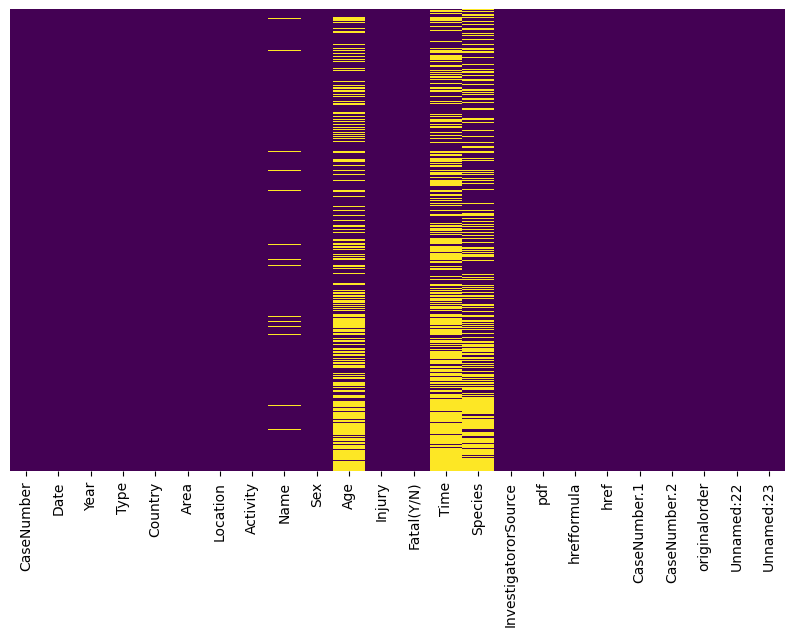

In [38]:
plt.figure(figsize=(10, 6))  # inicia la figura y establece el tamaño

sns.heatmap(data.isna(),    #visualizamos la cantidad de nulos
            yticklabels=False,  
            cmap='viridis',     
            cbar=False,         
           )


plt.show();

In [37]:
def fillna_all_columns(data, unknown):  #rellenamos los valores nulos con la palabra 'unknown'
    data.fillna(unknown, inplace=True)

# VALORES INCONSISTENTES
